In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
import time

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-1/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-1/test.csv')
data_val = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-1/val.csv')

data2 = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-2/Train.csv')
data2_test = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-2/Test.csv')
data2_val = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-2/Val.csv')

X_train = data[['x1','x2']].values
y_train = data['label'].values

X_test = data_test[['x1','x2']].values
y_test = data_test['label'].values

X_val = data_val[['x1','x2']].values
y_val = data_val['label'].values

#-------------------------------------------

X2_train = data2[['x1','x2']].values
y2_train = data2['label'].values

X2_test = data2_test[['x1','x2']].values
y2_test = data2_test['label'].values

X2_val = data2_val[['x1','x2']].values
y2_val = data2_val['label'].values

#------------------------------------------------

X3_train = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/train_data.csv').values
y3_train = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/train_label.csv').values

X3_test = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/test_data.csv').values
y3_test = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/test_label.csv').values

X3_val = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/val_data.csv').values
y3_val = pd.read_csv('/content/drive/MyDrive/IIT M/ASSIGNMENT - 3/Team25/Dataset-3/val_label.csv').values

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from itertools import permutations

def best_cluster_mapping_accuracy(true_labels, predicted_clusters):
    """
    Function to calculate the best possible accuracy by trying all cluster-to-class mappings.

    Parameters:
    true_labels (array-like): True class labels.
    predicted_clusters (array-like): Predicted cluster labels.

    Returns:
    best_accuracy (float): The highest accuracy obtained.
    best_mapping (dict): The best mapping from cluster to class label.
    """
    true_labels = np.array(true_labels)
    predicted_clusters = np.array(predicted_clusters)

    num_classes = len(np.unique(true_labels))  # Get number of unique classes

    best_accuracy = 0
    best_mapping = None

    # Try all permutations of the clusters
    for perm in permutations(np.unique(predicted_clusters)):
        # Create a mapping from cluster to class based on permutation
        cluster_to_class_mapping = {cluster: perm[i] for i, cluster in enumerate(np.unique(predicted_clusters))}

        # Map the predicted clusters to class labels using the current permutation
        mapped_labels = np.array([cluster_to_class_mapping[cluster] for cluster in predicted_clusters])

        # Calculate the accuracy
        accuracy = accuracy_score(true_labels, mapped_labels)

        # Update the best accuracy and mapping if the current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_mapping = cluster_to_class_mapping

    return best_accuracy, best_mapping

In [5]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

def calculate_gmm_accuracy(X_train, X_test, y_test):

    # Fit a GMM on the training data
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm.fit(X_train)

    # Predict the clusters for the test data
    y_test_pred_clusters = gmm.predict(X_test)

    best_accuracy, best_mapping = best_cluster_mapping_accuracy(y_test, y_test_pred_clusters)

    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Mapping: {best_mapping}")

In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

def calculate_gmm_accuracy2(X_train, X_test, y_test):
    # Fit a GMM on the training data
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X_train)

    # Predict the clusters for the test data
    y_test_pred_clusters = gmm.predict(X_test)
    # print(y_test_pred_clusters)
    best_accuracy, best_mapping = best_cluster_mapping_accuracy(y_test, y_test_pred_clusters)

    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Mapping: {best_mapping}")

In [7]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import accuracy_score
from itertools import permutations

def calculate_gmm_accuracy3(X_train, X_test, y_test):
    # Fit a GMM on the training data
    gmm = GaussianMixture(n_components=5, random_state=42)
    gmm.fit(X_train)

    # Predict the clusters for the test data
    y_test_pred_clusters = gmm.predict(X_test)

    best_accuracy, best_mapping = best_cluster_mapping_accuracy(y_test, y_test_pred_clusters)

    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Mapping: {best_mapping}")


In [8]:

print("Train")
calculate_gmm_accuracy(X_train, X_train, y_train)

print("Test")
calculate_gmm_accuracy(X_train, X_test, y_test)

print("Val")
calculate_gmm_accuracy(X_train, X_val, y_val)
#------------------------------------
print("_______________DATASET - 2 ____________________________")

print("Train")
calculate_gmm_accuracy2(X2_train, X2_train, y2_train)

print("Test")
calculate_gmm_accuracy2(X2_train, X2_test, y2_test)

print("Val")
calculate_gmm_accuracy2(X2_train, X2_val, y2_val)

#------------------------------------
print("_______________DATASET - 3 ____________________________")

print("Train")
calculate_gmm_accuracy3(X3_train, X3_train, y3_train)

print("Test")
calculate_gmm_accuracy3(X3_train, X3_test, y3_test)

print("Val")
calculate_gmm_accuracy3(X3_train, X3_val, y3_val)

Train
Best Accuracy: 0.9786
Best Mapping: {0: 1, 1: 2, 2: 0}
Test
Best Accuracy: 0.9833
Best Mapping: {0: 1, 1: 2, 2: 0}
Val
Best Accuracy: 0.9833
Best Mapping: {0: 1, 1: 2, 2: 0}
_______________DATASET - 2 ____________________________
Train
Best Accuracy: 0.8449
Best Mapping: {0: 1, 1: 0}
Test
Best Accuracy: 0.8875
Best Mapping: {0: 1, 1: 0}
Val
Best Accuracy: 0.8868
Best Mapping: {0: 1, 1: 0}
_______________DATASET - 3 ____________________________
Train
Best Accuracy: 0.4354
Best Mapping: {0: 2, 1: 3, 2: 4, 3: 0, 4: 1}
Test
Best Accuracy: 0.4324
Best Mapping: {0: 2, 1: 3, 2: 4, 3: 0, 4: 1}
Val
Best Accuracy: 0.4381
Best Mapping: {0: 2, 1: 3, 2: 4, 3: 0, 4: 1}


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

def plot_gmm_decision_boundary(X_train, Y_test, n_components=2, covariance_type='full'):
    """
    Plots the decision boundary of a GMM for a given training data and test labels.

    Parameters:
        X_train (array-like): Training data.
        Y_test (array-like): Test labels.
        n_components (int): Number of Gaussian components (clusters) for the GMM.
        covariance_type (str): Type of covariance ('full' or 'diag').
    """
    # Fit a GMM model on the training data
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X_train)

    # Create a meshgrid for the decision boundary plot
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict on the meshgrid
    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_test, s=50, edgecolors='k', cmap='coolwarm', label='Test Points')

    plt.title(f"GMM Decision Boundary (n_components={n_components}, Covariance: {covariance_type})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar()
    plt.legend()
    plt.show()

# Example usage
# Assuming X_train is your training data and Y_test is your test labels
# X_train, Y_test = your_training_data, your_test_labels
# plot_gmm_decision_boundary(X_train, Y_test, n_components=2, covariance_type='full')


In [10]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib import cm

def plot_gmm_decision_boundary(X_train, y_train, X_test, y_test, covariance_type='full', n_components=2):
    """
    Plots the decision boundary for a Gaussian Mixture Model with automatic color detection for clusters.

    Parameters:
    - X_train: Training data (features).
    - y_train: Training labels.
    - X_test: Testing data (features).
    - y_test: Testing labels.
    - covariance_type: Type of covariance for GMM ('full', 'diag').
    - n_components: Number of Gaussian components (clusters).
    """
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
    gmm.fit(X_train)

    # Predict labels for test data
    y_test_pred = gmm.predict(X_test)

    # Create a mesh grid for decision boundaries
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on the grid
    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Automatically handle color assignment based on unique labels
    unique_labels = np.unique(y_test_pred)
    colors = cm.get_cmap('viridis', len(unique_labels))  # Get colormap with enough colors

    # Scatter plot of the test points with assigned colors
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=30, cmap=colors, edgecolor='k')

    # Customize the plot
    plt.title(f'Decision Boundary for GMM with {covariance_type} covariance')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.colorbar(label='Cluster Label')
    plt.show()


<ipython-input-10-593b404989c2>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_labels))  # Get colormap with enough colors


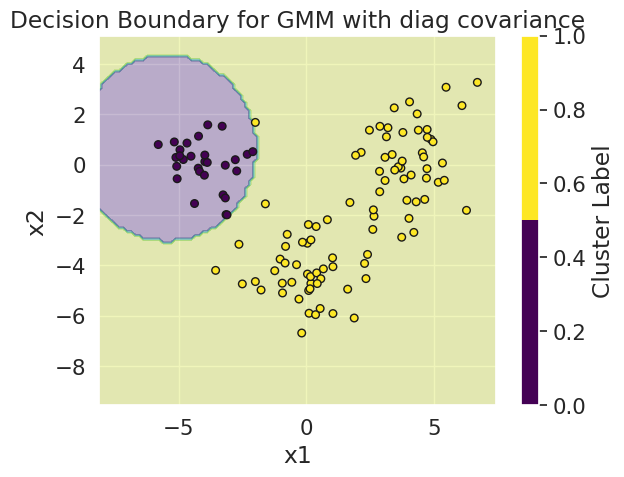

In [11]:
plot_gmm_decision_boundary(X_train, y_train, X_test, y_test, covariance_type='diag', n_components=2)

<ipython-input-10-593b404989c2>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_labels))  # Get colormap with enough colors


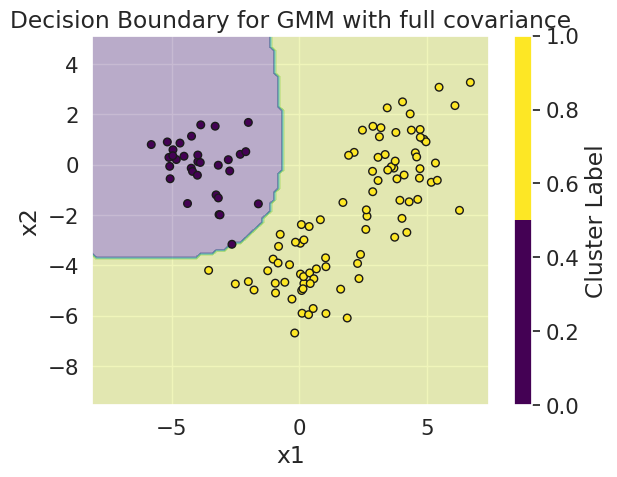

In [12]:
plot_gmm_decision_boundary(X_train, y_train, X_test, y_test, covariance_type='full', n_components=2)

<ipython-input-10-593b404989c2>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_labels))  # Get colormap with enough colors


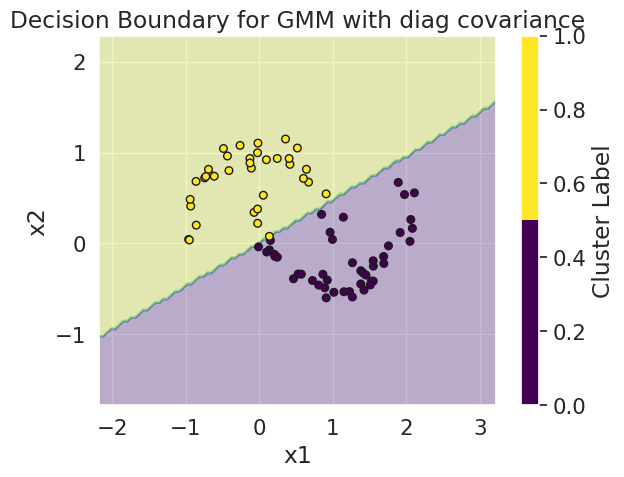

In [13]:
plot_gmm_decision_boundary(X2_train, y2_train, X2_test, y2_test, covariance_type='diag', n_components=2)

<ipython-input-10-593b404989c2>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_labels))  # Get colormap with enough colors


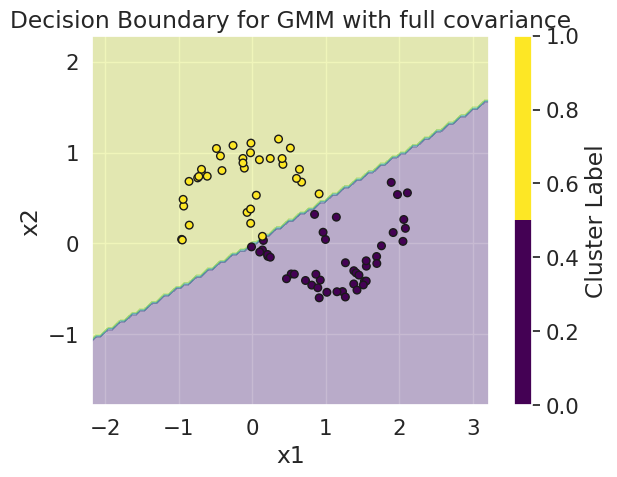

In [14]:
plot_gmm_decision_boundary(X2_train, y2_train, X2_test, y2_test, covariance_type='full', n_components=2)